In [1]:
import os
data_file='quora_duplicate_questions.tsv'

In [2]:
LOAD_ENCODING_FROM_FILE=1 
encoding_data_file_quest1='encoding_quest1'
encoding_data_file_quest2='encoding_quest2'
encoding_data_file_label='label'

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
from bert_serving.client import BertClient
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dropout

/home/swayam/anaconda3/envs/dia/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
maxlen = 256

In [6]:
# Save the encodings in a file 
if LOAD_ENCODING_FROM_FILE == 1:
    with open(encoding_data_file_quest1, "rb") as fp:
        vec1=pickle.load(fp)
    with open(encoding_data_file_quest2, "rb") as fp:   
        vec2=pickle.load(fp)
    with open(encoding_data_file_label, "rb") as fp: 
        label=pickle.load(fp)

In [7]:
vec1 = np.concatenate( vec1, axis=0 )
vec2 = np.concatenate( vec2, axis=0 )

In [8]:
train_vec1 = np.asarray(vec1, np.float32)
train_vec2 = np.asarray(vec2, np.float32)
train_label = np.asarray(label,np.float32)
print(np.shape(train_vec1))
print(np.shape(train_vec2))
print(np.shape(train_label))

(1000, 768)
(1000, 768)
(1000,)


In [9]:
import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model

In [10]:
inp1= Input(shape=(768,))
inp2= Input(shape=(768,))

In [11]:
x = keras.layers.concatenate([inp1, inp2],axis=-1)
x = Dense(1024, activation='relu')(x) #
x = Dropout(0.5) (x) #
x = Dense(256, activation='relu')(x) #
x = Dropout(0.5) (x) #
x = Dense(64, activation='relu')(x)
out=Dense(1,activation='sigmoid')(x)
model = Model(inputs=[inp1,inp2], outputs=out)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 768)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 768)          0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 1536)         0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (De

In [12]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
history=model.fit([train_vec1, train_vec2], train_label, epochs=30,batch_size=32,validation_split=0.2)


Train on 800 samples, validate on 200 samples
Epoch 1/30
800/800 [==============================] - 1s 637us/step - loss: 1.0690 - acc: 0.5675 - val_loss: 0.6664 - val_acc: 0.6000
Epoch 2/30
800/800 [==============================] - 0s 490us/step - loss: 0.7345 - acc: 0.5888 - val_loss: 0.7193 - val_acc: 0.4000
Epoch 3/30
800/800 [==============================] - 0s 479us/step - loss: 0.7131 - acc: 0.5925 - val_loss: 0.6918 - val_acc: 0.5000
Epoch 4/30
800/800 [==============================] - 0s 476us/step - loss: 0.7024 - acc: 0.5813 - val_loss: 0.6693 - val_acc: 0.6000
Epoch 5/30
800/800 [==============================] - 0s 475us/step - loss: 0.6975 - acc: 0.5987 - val_loss: 0.7033 - val_acc: 0.4400
Epoch 6/30
800/800 [==============================] - 0s 499us/step - loss: 0.6833 - acc: 0.5962 - val_loss: 0.6829 - val_acc: 0.5500
Epoch 7/30
800/800 [==============================] - 0s 472us/step - loss: 0.6874 - acc: 0.6000 - val_loss: 0.6664 - val_acc: 0.6100
Epoch 8/30
800/

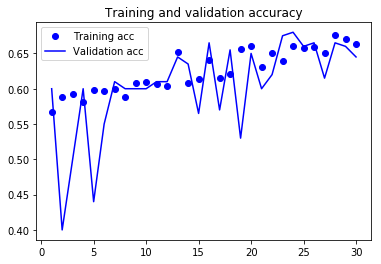

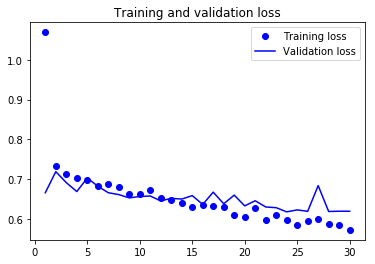

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
#model.save('third_model.h5')